# Stats701 Homework 7, Winter 2018
### David Guo
#### davidguo@umich.edu

Discussion: No discussion 

Time to do each homework problem:

- Problem 1 took about 1.5 hours

- Problem 2 took about 1.5 hours
    
- Problem 3 took about 6 hours (Could not figure out how to get diagonals colored)

- Write-up took about 1 hour

In [1]:
import pandas as pd
import numpy as np

### 1

#### 1.1

In [2]:
inds = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

We use the primes generator from hw 5:

In [3]:
def primes():
    p = 1
    while True:
        p += 1
        if any(list(map(lambda x: divmod(p,x)[1] == 0, range(2, p)))) == False:
            yield p
            
p = primes()
p_10 = list(next(p) for _ in range(10))
p_10

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

In [4]:
d = dict()
for i in range(len(inds)):
    d[inds[i]] = p_10[i]
d

{'a': 2,
 'b': 3,
 'c': 5,
 'd': 7,
 'e': 11,
 'f': 13,
 'g': 17,
 'h': 19,
 'i': 23,
 'j': 29}

In [5]:
p = pd.Series(d, index = inds)
p

a     2
b     3
c     5
d     7
e    11
f    13
g    17
h    19
i    23
j    29
dtype: int64

#### 1.2

In [6]:
a = ['goat'] * 4 + ['bird'] * 4 + ['llama'] * 4
p1 = ['A', 'A', 'a', 'a'] * 3
p2 = ['A', 'a', 'A', 'a'] * 3

t = list(zip(*[a,p1,p2]))
t

[('goat', 'A', 'A'),
 ('goat', 'A', 'a'),
 ('goat', 'a', 'A'),
 ('goat', 'a', 'a'),
 ('bird', 'A', 'A'),
 ('bird', 'A', 'a'),
 ('bird', 'a', 'A'),
 ('bird', 'a', 'a'),
 ('llama', 'A', 'A'),
 ('llama', 'A', 'a'),
 ('llama', 'a', 'A'),
 ('llama', 'a', 'a')]

In [7]:
index = pd.MultiIndex.from_tuples(t, names = ['animal', 'parent1', 'parent2'])

In [8]:
# https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html
col1 = np.arange(1,13,1)
col2 = np.array([2]) #initial value of 2

for i in range(2,7):
    col2 = np.append(col2, np.repeat([2 * i], 2)) # repeat multiples of 2 twice from 4-12
col2 = np.append(col2, 14) # add on 14 at the end.

In [9]:
df = pd.DataFrame(np.transpose(np.array([col1, col2])), 
                  index = index, 
                  columns = ['score1', 'score2'])
df

score1  score2
animal parent1 parent2                
goat   A       A             1       2
               a             2       4
       a       A             3       4
               a             4       6
bird   A       A             5       6
               a             6       8
       a       A             7       8
               a             8      10
llama  A       A             9      10
               a            10      12
       a       A            11      12
               a            12      14

### 2
#### 2.1

In [10]:
iris = pd.read_csv("iris.csv")
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


There are 150 data points in the set. The data types are float64 (64bit float) (and Species as the pandas index object).

The column names are Sepal.Length, Sepal.Width, Petal.Length, Petal.Width, and Species. The flower's sepal and petals are measured in width and length. The Species column is the name of the flower.

In [12]:
iris['Species'].describe()

count           150
unique            3
top       virginica
freq             50
Name: Species, dtype: object

There are 3 unique species

#### 2.2

In [13]:
iris.iloc[34]

Sepal.Length       4.9
Sepal.Width        3.1
Petal.Length       1.5
Petal.Width        0.1
Species         setosa
Name: 34, dtype: object

In [14]:
# http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

iris.loc[34,'Petal.Width'] = 0.2

In [15]:
iris.iloc[34]

Sepal.Length       4.9
Sepal.Width        3.1
Petal.Length       1.5
Petal.Width        0.2
Species         setosa
Name: 34, dtype: object

In [16]:
iris.iloc[37]

Sepal.Length       4.9
Sepal.Width        3.1
Petal.Length       1.5
Petal.Width        0.1
Species         setosa
Name: 37, dtype: object

In [17]:
iris.loc[37, 'Sepal.Width'] = 3.6
iris.loc[37, 'Petal.Length'] = 1.4

In [18]:
iris.iloc[37]

Sepal.Length       4.9
Sepal.Width        3.6
Petal.Length       1.4
Petal.Width        0.1
Species         setosa
Name: 37, dtype: object

#### 2.3

In [19]:
iris['Petal.Ratio'] = iris['Petal.Length']/iris['Petal.Width']
iris['Sepal.Ratio'] = iris['Sepal.Length']/iris['Sepal.Width']

In [20]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Petal.Ratio,Sepal.Ratio
0,5.1,3.5,1.4,0.2,setosa,7.000000,1.457143
1,4.9,3.0,1.4,0.2,setosa,7.000000,1.633333
2,4.7,3.2,1.3,0.2,setosa,6.500000,1.468750
3,4.6,3.1,1.5,0.2,setosa,7.500000,1.483871
4,5.0,3.6,1.4,0.2,setosa,7.000000,1.388889
5,5.4,3.9,1.7,0.4,setosa,4.250000,1.384615
6,4.6,3.4,1.4,0.3,setosa,4.666667,1.352941
7,5.0,3.4,1.5,0.2,setosa,7.500000,1.470588
8,4.4,2.9,1.4,0.2,setosa,7.000000,1.517241
9,4.9,3.1,1.5,0.1,setosa,15.000000,1.580645


#### 2.4

In [21]:
iris.to_csv("iris_corrected.csv", index_label = False)

#### 2.5

In [154]:
iris_fix = pd.read_csv("iris_corrected.csv")

In [155]:
iris_ratio_stats = iris_fix.groupby('Species')['Petal.Ratio','Sepal.Ratio'].agg([np.mean, np.median, np.min, np.max, np.std])

In [156]:
iris_ratio_stats

Petal.Ratio                                     Sepal.Ratio  \
                  mean    median      amin  amax       std        mean   
Species                                                                  
setosa        6.908000  7.000000  2.666667  15.0  2.854545    1.470188   
versicolor    3.242837  3.240385  2.666667   4.1  0.312456    2.160402   
virginica     2.780662  2.666667  2.125000   4.0  0.407367    2.230453   

                                                    
              median      amin      amax       std  
Species                                             
setosa      1.463063  1.268293  1.956522  0.118750  
versicolor  2.161290  1.764706  2.818182  0.228658  
virginica   2.169540  1.823529  2.961538  0.246992

### 3

#### 3.1

In [157]:
import matplotlib as mp
import matplotlib.pyplot as plt

%matplotlib inline

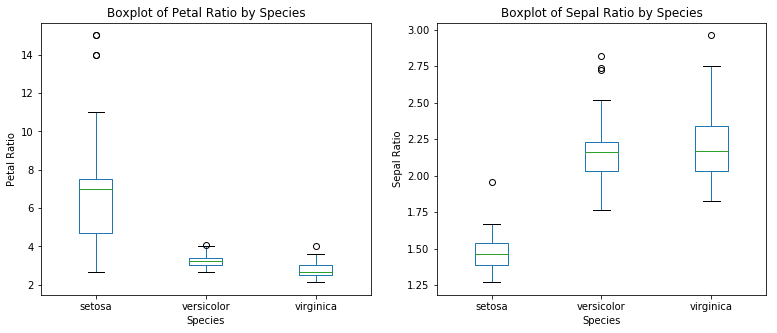

In [158]:
#https://pandas.pydata.org/pandas-docs/stable/visualization.html#subplots

#Pivot the subset of species and ratio to get columns of each species with ratios as values.

fig, axes = plt.subplots(1, 2, sharey = False, figsize = (13,5)) #define the subplots

#set labels of subplot using axes[i]

iris_fix[['Species','Petal.Ratio']].pivot(columns = 'Species')['Petal.Ratio'].plot.box(ax = axes[0])
axes[0].set_ylabel('Petal Ratio')
axes[0].set_xlabel('Species')
axes[0].set_title('Boxplot of Petal Ratio by Species')

iris_fix[['Species','Sepal.Ratio']].pivot(columns = 'Species')['Sepal.Ratio'].plot.box(ax = axes[1])
axes[1].set_ylabel('Sepal Ratio')
axes[1].set_xlabel('Species')
axes[1].set_title('Boxplot of Sepal Ratio by Species')

#### 3.2

In [145]:
from pandas.plotting import scatter_matrix

In [151]:
del iris_fix['Petal.Ratio']
del iris_fix['Sepal.Ratio']

In [152]:
iris_fix

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Petal.Ratio,Sepal.Ratio
0,5.1,3.5,1.4,0.2,setosa,7.000000,1.457143
1,4.9,3.0,1.4,0.2,setosa,7.000000,1.633333
2,4.7,3.2,1.3,0.2,setosa,6.500000,1.468750
3,4.6,3.1,1.5,0.2,setosa,7.500000,1.483871
4,5.0,3.6,1.4,0.2,setosa,7.000000,1.388889
5,5.4,3.9,1.7,0.4,setosa,4.250000,1.384615
6,4.6,3.4,1.4,0.3,setosa,4.666667,1.352941
7,5.0,3.4,1.5,0.2,setosa,7.500000,1.470588
8,4.4,2.9,1.4,0.2,setosa,7.000000,1.517241
9,4.9,3.1,1.5,0.1,setosa,15.000000,1.580645


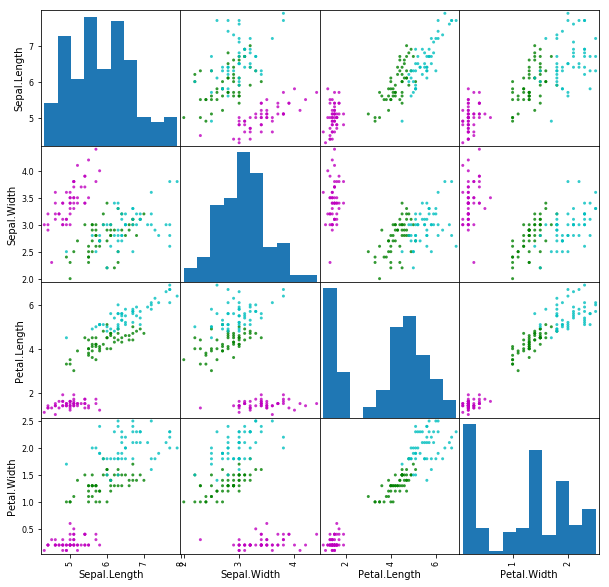

In [153]:
# create color map 
colors = ['m'] * 150

for i in range(len(iris_fix['Species'])):
    if iris_fix['Species'][i] == 'setosa':
        colors[i] = 'm'
    elif iris_fix['Species'][i] == 'virginica':
        colors[i] = 'c'
    elif iris_fix['Species'][i] == 'versicolor':
        colors[i] = 'g'
s = scatter_matrix(iris_fix, figsize = (10,10), c = colors, alpha = 0.8)